In [31]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### Loading data 

In [8]:
loaded=np.load('lrs.npz')
lrs = loaded['arr_0']
conds = loaded['arr_1']
high_idx = loaded['arr_2']

In [9]:
lrs.shape # participants by conditions 

(86, 8)

In [10]:
conds # conditions 

array(['good_stab_rew', 'good_vol_rew', 'bad_stab_rew', 'bad_vol_rew',
       'good_stab_pain', 'good_vol_pain', 'bad_stab_pain', 'bad_vol_pain'],
      dtype='<U14')

In [11]:
high_idx # high or low on general factor 

array([ True, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False, False, False, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True])

### Example Plotting

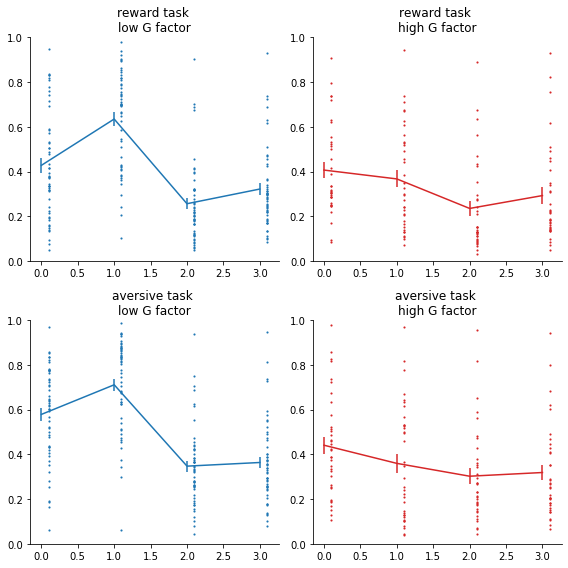

In [44]:
fig,axes = plt.subplots(2,2,figsize=(8,8))
ax1 = axes[0,0]
ax2 = axes[1,0]
ax3 = axes[0,1]
ax4 = axes[1,1]

for i,(ax,task,split) in enumerate(zip([ax1,ax2,ax3,ax4],
                                 ['reward','aversive','reward','aversive'],
                                 ['low','low','high','high'])):
    
    # create selectors 
    if task=='reward':
        cond_sel = slice(0,4)
    elif task=='aversive':
        cond_sel = slice(4,8)
    
    if split=='high':
        idx = high_idx.copy()
        color=sns.color_palette()[3]
    elif split=='low':
        idx = np.logical_not(high_idx.copy())
        color=sns.color_palette()[0]
        
    # get data 
    y = lrs[idx,cond_sel]
    
    # set up axis
    plt.sca(ax)
    
    # plot means/se's
    plt.errorbar(np.arange(4),y=np.mean(y,axis=0),yerr=np.std(y,axis=0)/np.sqrt(len(y)),c=color)
    
    # plot individuals
    for i in range(4):
        plt.scatter(np.ones_like(y[:,i])*i+0.1,
                    y[:,i],color=color,s=5,marker='.');
    
    # plot style
    plt.title(task+' task \n'+split+' G factor')
    plt.ylim([0,1])
    sns.despine()
    plt.tight_layout()
    